# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

直接建構仿射矩陣 (圖片至少包含 3 個點以上的 pair)
cv2.getAffineTransform (譬如：圖片1的點，圖片2的點，input 應該包含兩張對應圖片的點)

In [ ]:
import cv2
import time
import numpy as np

In [ ]:
img_path = '../images/lena.png'
img_bgr = cv2.imread( img_path )

## Affine Transformation - Case 2: any three point

In [ ]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img_bgr.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
M_affine = cv2.getAffineTransform( pt1, pt2 )
img_affine = cv2.warpAffine( img_bgr, M_affine, (cols, rows) )

# 在圖片上標記點
img_bgr_copy = img_bgr.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_bgr_copy, pts, 3, (0,0,255), -1)
    cv2.putText(img_bgr_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0,0,255), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 1)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_bgr_copy, img_affine))
while True:
    cv2.imshow( 'Affine Transformation', img_show_affine )
    cv2.imwrite( 'Affine_Transformation.jpg', img_show_affine )
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

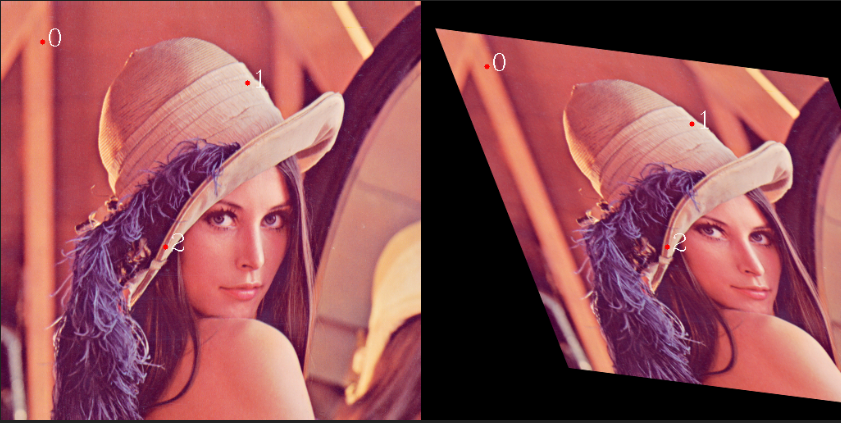